In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_dir = "data"
train_data_path = os.path.join(data_dir, "train.csv")
test_data_path  = os.path.join(data_dir, "test.csv")
graph_data_path = os.path.join(data_dir, "graph.csv")

In [3]:
# https://gist.github.com/rogerallen/1583593
# ^ Use this in case we need state code translation

from sklearn.preprocessing import StandardScaler

import math
import matplotlib.pyplot as plt
class utils:
    def __init__(self):
        pass
    
    def split(self, dataframe, test=0.2):
        size = dataframe.shape
        train_size = size[0] - math.floor(size[0] * test)
        return dataframe[:train_size], dataframe[train_size:]
    
class CoreData(object):
    def __init__(self, data_path = None, debug=False):
        if not data_path:
            raise Exception("Input file path!")
        self.data_path = data_path
        self.df = None
        self.states = []
        self.state_df = {}
        self.debug = debug
        
    def load(self, normalize=True):
        '''
        DataProcessor.load()
        Pre-load data state-by-state to a dictionary.
        '''
        # Change this line to modify dropped data series.
        dropped_col = ['ID', 'Province_State']
        
        self.df = pd.read_csv(train_data_path)
        self.states = list(np.unique(self.df['Province_State']))
        self.state_df = dict.fromkeys(self.states, None)
        
        for s in self.states:
            df_filter = self.df['Province_State'] == s
            tmp_state_df = self.df[df_filter]
            self.state_df[s] = tmp_state_df.drop(dropped_col, 1)
            
            # Normalize
            if normalize:
                mean = self.state_df[s].mean()
                std = self.state_df[s].std()
                self.state_df[s] = (self.state_df[s] - mean)/std
    
    def access(self, state=None):
        if not state:
            raise Exception('Enter state name! i.e. self.access("California")')
        elif state not in self.states:
            raise Exception('Check your spelling of the state.')
        return self.state_df[state]
    
    def access_split(self, state=None, test_portion=0.2):
        df = self.access(state)
        return utils().split(dataframe=df, test=test_portion)


In [4]:
dp = CoreData(train_data_path)

In [5]:
dp.load(False)

# Study Correlation

In [31]:
import seaborn as sns
df = dp.access("Florida")

df.keys()

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

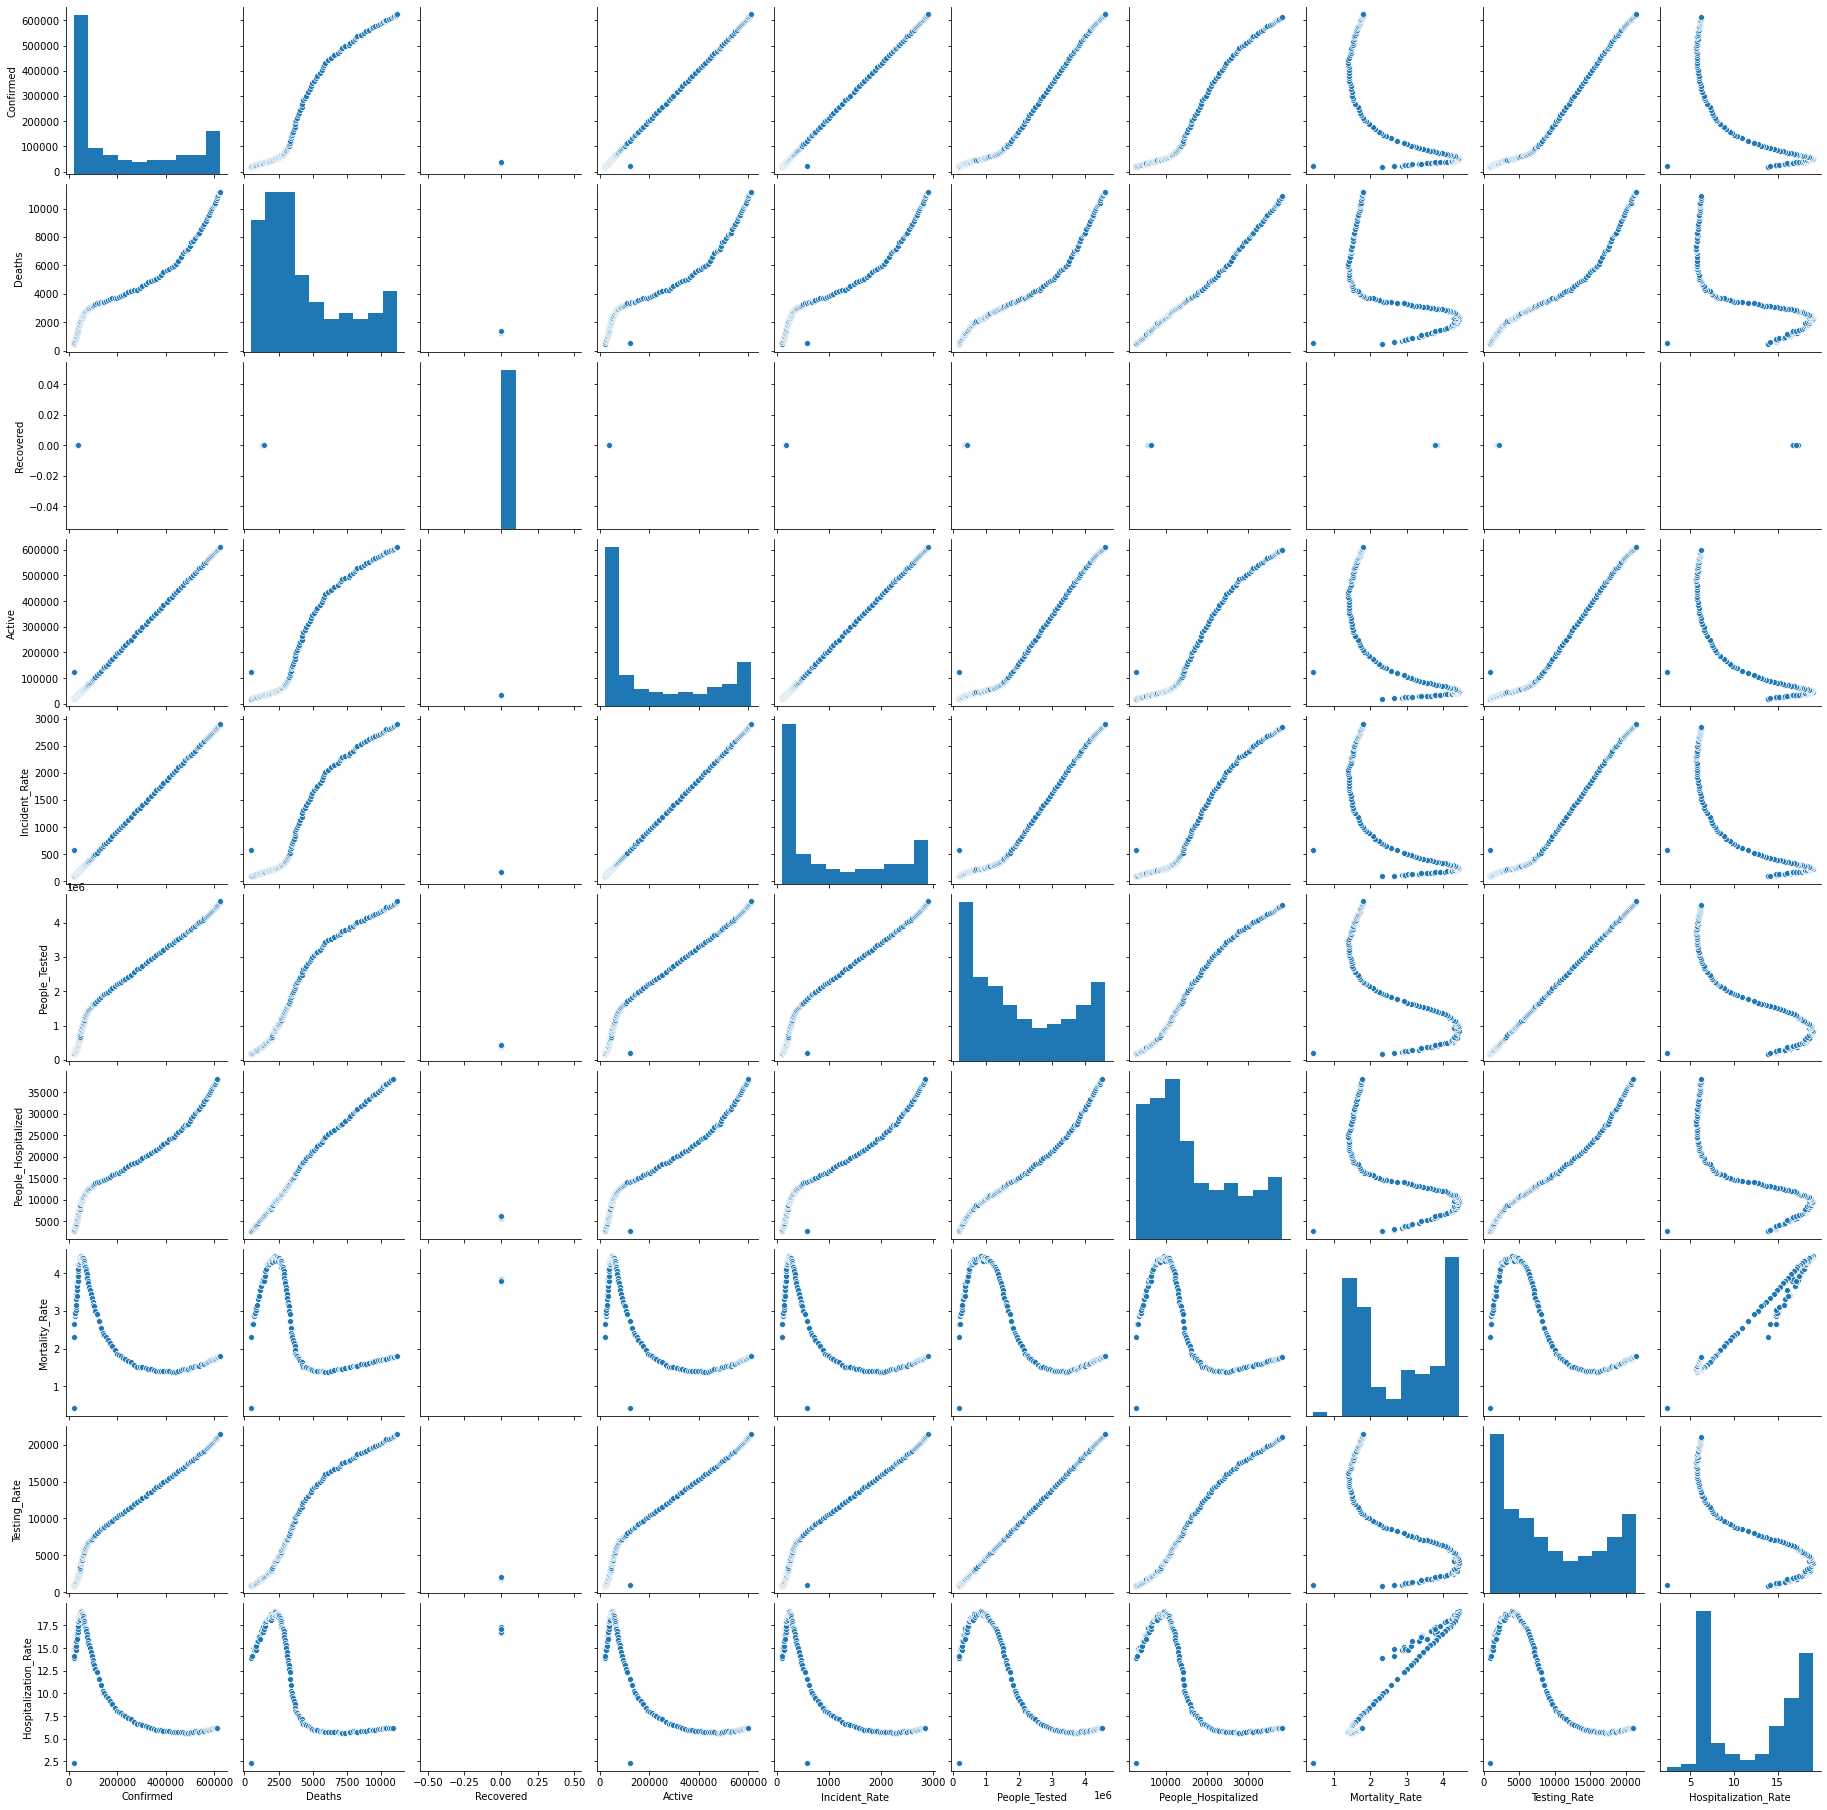

In [34]:
sns.pairplot(df)

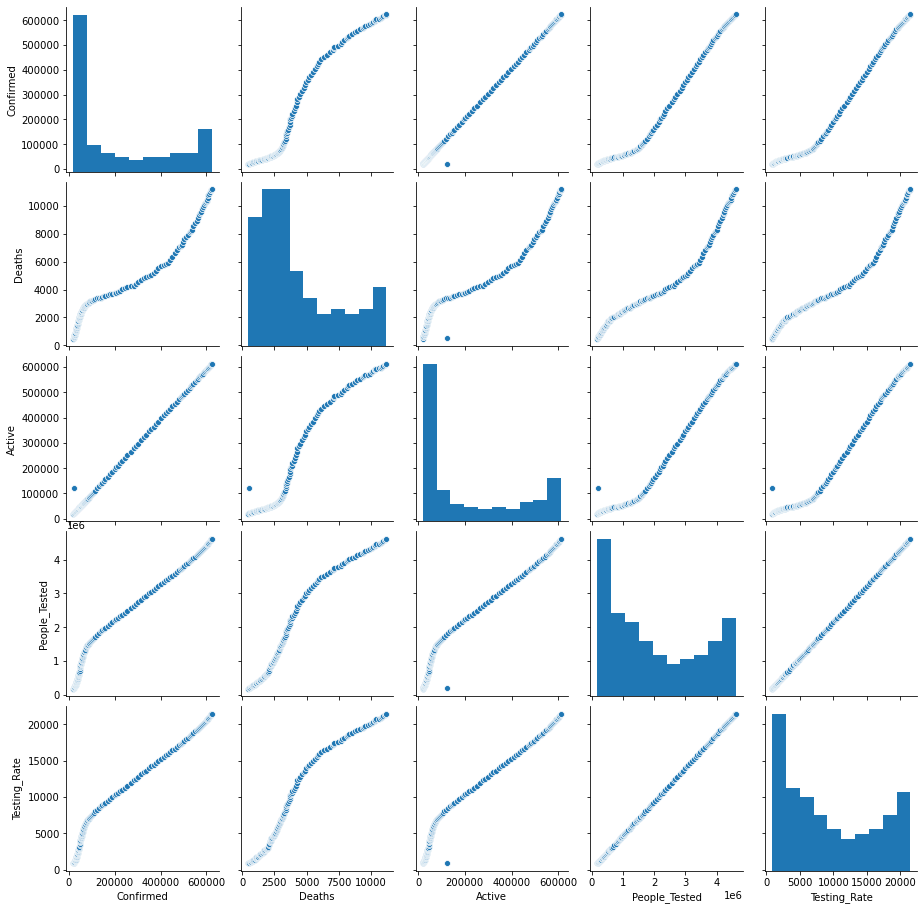

In [33]:
dropped_df = df.drop(['Date', 'Hospitalization_Rate','Mortality_Rate','People_Hospitalized', 'Recovered', 'Incident_Rate'], 1)
sns.pairplot(dropped_df)

In [66]:
t = dp.access_split('California')

In [67]:
import math
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [140]:
state = 'Arkansas'

In [141]:
training_data, test_data = dp.access_split(state, 0)
data = dp.access(state)

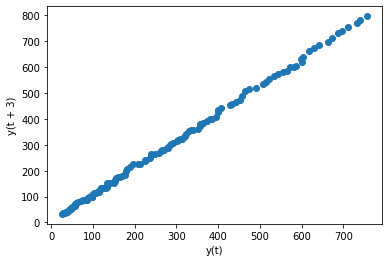

In [142]:
plt.figure()
lag_plot(data['Deaths'], lag=3)
plt.show()

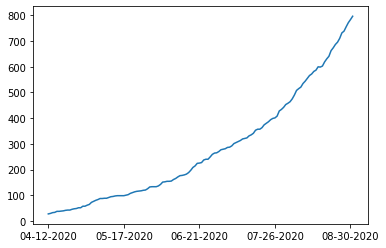

In [143]:
plt.plot(data['Date'], data['Deaths'])
plt.xticks(np.arange(0,len(data), len(data)//4), data['Date'][0:len(data):len(data)//4])
plt.show()

In [144]:
training_data = training_data['Deaths'].values
test_data = test_data['Deaths'].values

In [145]:
history = [x for x in training_data]
model_predictions = []
N_test = 26

In [146]:
len(history)

142

In [147]:
history = [x for x in training_data]
model_predictions = []
N_test = 26
for time in range(N_test):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = yhat
    history.append(true_test_value)
M = []
for m in model_predictions:
    M.append(m.tolist()[0])

/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [148]:
print(model_predictions)
print(M)

[array([810.07028495]), array([821.76062343]), array([832.88795666]), array([843.91642925]), array([854.43144775]), array([864.43084478]), array([874.14585885]), array([883.5635177]), array([892.64133042]), array([901.44291869]), array([910.00883403]), array([918.33889729]), array([926.45136849]), array([934.37302613]), array([942.11776979]), array([949.6973114]), array([957.12710812]), array([964.42034609]), array([971.58743724]), array([978.63882695]), array([985.58451025]), array([992.43315355]), array([999.19266824]), array([1005.8705221]), array([1012.47350983]), array([1019.00778588])]
[810.070284954664, 821.7606234257258, 832.887956657318, 843.9164292521415, 854.4314477500376, 864.4308447794972, 874.1458588514789, 883.5635177005516, 892.6413304246214, 901.4429186920987, 910.0088340266484, 918.3388972896056, 926.451368487327, 934.3730261283785, 942.1177697949562, 949.6973113979014, 957.1271081207931, 964.420346094547, 971.5874372431233, 978.6388269515961, 985.5845102483115, 992.4

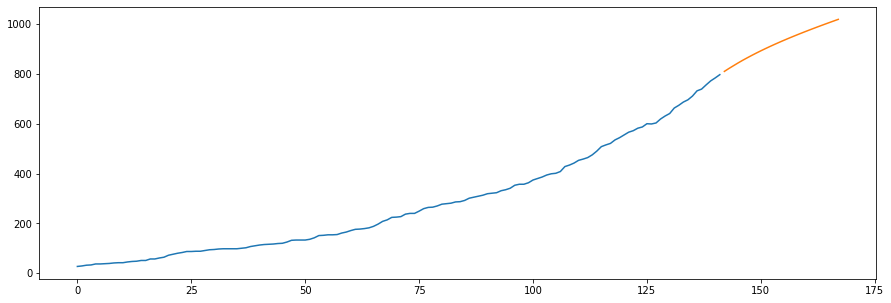

In [149]:
num_state_train = training_data.shape[0]
forecast_range = np.arange(num_state_train, num_state_train+26)

plt.figure(figsize=(15, 5))
plt.plot(training_data)
plt.plot(forecast_range, M)
plt.show()

In [153]:
states = dp.states

In [154]:
N_test = 26
keys = ['Deaths', 'Confirmed']
results_death = {}
for state in states:
    print(f"Processing: {state}...")
    training_data, test_data = dp.access_split(state, 0)
    data = dp.access(state)
    training_data = training_data['Deaths'].values
    test_data = test_data['Deaths'].values
    history = [x for x in training_data]
    model_predictions = []
    for time in range(N_test):
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = yhat
        history.append(true_test_value)
    M = []
    for m in model_predictions:
        M.append(m.tolist()[0])
        
    
    results_death[state] = M

Processing: Alabama...


/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Processing: Alaska...
Processing: Arizona...
Processing: Arkansas...
Processing: California...
Processing: Colorado...
Processing: Connecticut...
Processing: Delaware...
Processing: Florida...
Processing: Georgia...
Processing: Hawaii...
Processing: Idaho...
Processing: Illinois...
Processing: Indiana...
Processing: Iowa...
Processing: Kansas...
Processing: Kentucky...
Processing: Louisiana...
Processing: Maine...
Processing: Maryland...
Processing: Massachusetts...
Processing: Michigan...
Processing: Minnesota...
Processing: Mississippi...
Processing: Missouri...
Processing: Montana...
Processing: Nebraska...
Processing: Nevada...
Processing: New Hampshire...
Processing: New Jersey...
Processing: New Mexico...
Processing: New York...
Processing: North Carolina...
Processing: North Dakota...
Processing: Ohio...
Processing: Oklahoma...
Processing: Oregon...
Processing: Pennsylvania...


/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing: Rhode Island...
Processing: South Carolina...
Processing: South Dakota...
Processing: Tennessee...
Processing: Texas...
Processing: Utah...
Processing: Vermont...


/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing: Virginia...
Processing: Washington...
Processing: West Virginia...
Processing: Wisconsin...
Processing: Wyoming...


In [156]:
result_confirmed = {}
for state in states:
    print(f"Processing: {state}...")
    training_data, test_data = dp.access_split(state, 0)
    data = dp.access(state)
    training_data = training_data['Confirmed'].values
    test_data = test_data['Confirmed'].values
    history = [x for x in training_data]
    model_predictions = []
    for time in range(N_test):
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = yhat
        history.append(true_test_value)
    M = []
    for m in model_predictions:
        M.append(m.tolist()[0])
        
    
    result_confirmed[state] = M

Processing: Alabama...
Processing: Alaska...
Processing: Arizona...
Processing: Arkansas...
Processing: California...
Processing: Colorado...
Processing: Connecticut...
Processing: Delaware...
Processing: Florida...
Processing: Georgia...
Processing: Hawaii...
Processing: Idaho...
Processing: Illinois...
Processing: Indiana...
Processing: Iowa...
Processing: Kansas...
Processing: Kentucky...
Processing: Louisiana...
Processing: Maine...
Processing: Maryland...
Processing: Massachusetts...
Processing: Michigan...
Processing: Minnesota...
Processing: Mississippi...
Processing: Missouri...
Processing: Montana...
Processing: Nebraska...
Processing: Nevada...
Processing: New Hampshire...
Processing: New Jersey...


/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Processing: New Mexico...
Processing: New York...
Processing: North Carolina...
Processing: North Dakota...
Processing: Ohio...
Processing: Oklahoma...


/Users/jackzhao/Documents/UCLA/F20/CS 145/COVID19-Prediction/venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing: Oregon...
Processing: Pennsylvania...
Processing: Rhode Island...
Processing: South Carolina...
Processing: South Dakota...
Processing: Tennessee...
Processing: Texas...
Processing: Utah...
Processing: Vermont...
Processing: Virginia...
Processing: Washington...
Processing: West Virginia...
Processing: Wisconsin...
Processing: Wyoming...


In [160]:
forecastID = [x for x in range(26*50)]
deaths = []
confirmed = []

for i in range(26):
    for s in states:
        print(f"Day {i}/26, {s}")
        confirmed.append(result_confirmed[s][i])
        deaths.append(results_death[s][i])


Day 0/26, Alabama
Day 0/26, Alaska
Day 0/26, Arizona
Day 0/26, Arkansas
Day 0/26, California
Day 0/26, Colorado
Day 0/26, Connecticut
Day 0/26, Delaware
Day 0/26, Florida
Day 0/26, Georgia
Day 0/26, Hawaii
Day 0/26, Idaho
Day 0/26, Illinois
Day 0/26, Indiana
Day 0/26, Iowa
Day 0/26, Kansas
Day 0/26, Kentucky
Day 0/26, Louisiana
Day 0/26, Maine
Day 0/26, Maryland
Day 0/26, Massachusetts
Day 0/26, Michigan
Day 0/26, Minnesota
Day 0/26, Mississippi
Day 0/26, Missouri
Day 0/26, Montana
Day 0/26, Nebraska
Day 0/26, Nevada
Day 0/26, New Hampshire
Day 0/26, New Jersey
Day 0/26, New Mexico
Day 0/26, New York
Day 0/26, North Carolina
Day 0/26, North Dakota
Day 0/26, Ohio
Day 0/26, Oklahoma
Day 0/26, Oregon
Day 0/26, Pennsylvania
Day 0/26, Rhode Island
Day 0/26, South Carolina
Day 0/26, South Dakota
Day 0/26, Tennessee
Day 0/26, Texas
Day 0/26, Utah
Day 0/26, Vermont
Day 0/26, Virginia
Day 0/26, Washington
Day 0/26, West Virginia
Day 0/26, Wisconsin
Day 0/26, Wyoming
Day 1/26, Alabama
Day 1/26, 

In [163]:
final = pd.DataFrame(list(zip(forecastID, confirmed, deaths)), 
               columns =['ForecastID', 'Confirmed', 'Deaths'], index=False) 

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [164]:
final.to_csv("submission.csv", index=False)

In [ ]:
num_state_train = training_data.shape[0]
forecast_range = np.arange(num_state_train, num_state_train+26)

plt.figure(figsize=(10, 5))
plt.plot(training_data)
plt.plot(forecast_range, M)
plt.show()